In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Data training
data = {
    'Temperatur': [10, 25, 15, 20, 18, 20, 22, 24],
    'Kecepatan_Angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'Persepsi': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}

df = pd.DataFrame(data)
df

,Temperatur,Kecepatan_Angin,Persepsi
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


In [3]:
# Fitur dan target
X = df[['Temperatur', 'Kecepatan_Angin']]
y = df['Persepsi']

In [4]:
# Bagi data menjadi train dan test 75% dan 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("\nSplit Data (25% Test):")
print(f"Jumlah data latih : {len(X_train)}")
print(f"Jumlah data uji : {len(X_test)}")


Split Data (25% Test):
Jumlah data latih : 6
Jumlah data uji : 2


In [5]:
# Mencari k terbaik
best_k = 1
best_accuracy = 0
max_k = len(X_train)  # Batas k maksimal
k_values = list(range(1, max_k + 1))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k}, Accuracy = {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nNilai k terbaik adalah {best_k} dengan akurasi {best_accuracy:.2f}")

k = 1, Accuracy = 1.00
k = 2, Accuracy = 1.00
k = 3, Accuracy = 1.00
k = 4, Accuracy = 1.00
k = 5, Accuracy = 0.50
k = 6, Accuracy = 0.50

Nilai k terbaik adalah 1 dengan akurasi 1.00


In [6]:
# Latih ulang dengan seluruh data training dan prediksi data test
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X, y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
# Data test untuk prediksi Marry
test_data = np.array([[16, 3]])  # Temperatur 16°C, kecepatan angin 3 km/jam
prediksi_test = knn_best.predict(test_data)

print(f"\nPrediksi persepsi Marry untuk temperatur 16°C dan kecepatan angin 3 km/jam adalah: {prediksi_test[0]}")


Prediksi persepsi Marry untuk temperatur 16°C dan kecepatan angin 3 km/jam adalah: Dingin


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


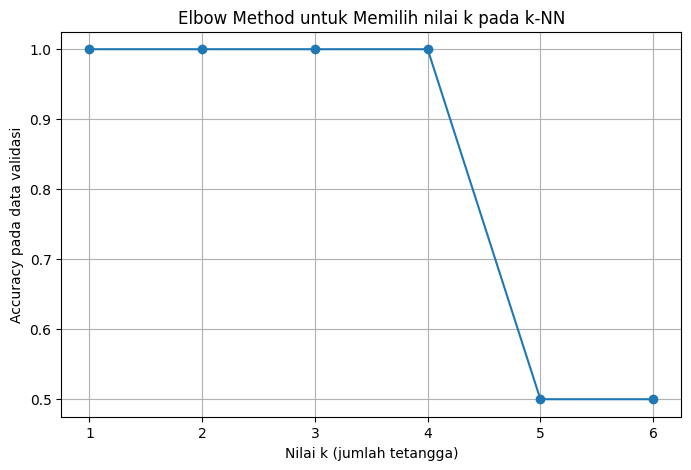

In [8]:
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Elbow Method untuk Memilih nilai k pada k-NN')
plt.xlabel('Nilai k (jumlah tetangga)')
plt.ylabel('Accuracy pada data validasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()